### Imports and helper functions

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import datetime
import cartopy
import numpy as np

from matplotlib import style
style.use('/home/callum/org-life/better-defaults/presentation.mplstyle')
import matplotlib.dates as mdates

In [23]:
# plotter functions
def ticker(ax):
    days = (10, 20)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_minor_locator(mdates.DayLocator(days))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("\n%b %Y"))
    ax.xaxis.set_minor_formatter(mdates.DateFormatter("%dth"))
    ax.tick_params(axis="x", which="both", length=4)
    ax.grid(which="both")
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center")
def plot_oxy(ds, ax, min_depth=70):
    mask = ds.depth.values > min_depth
    label = f'SEA0{ds.attrs["glider_serial"]} M{ds.attrs["deployment_id"]}'
    ax.scatter(ds.time[mask], ds.oxygen_concentration[mask], s=5, label=label)

### Dataset import

See email for download link to datasets

In [2]:
# import datasets
ds_sea66_m10 = xr.open_dataset("data/sea066/m10.nc")
ds_sea66_m12 = xr.open_dataset("data/sea066/m12.nc")
ds_sea66_m14 = xr.open_dataset("data/sea066/m14.nc")

ds_sea67_m26 = xr.open_dataset("data/sea067/m26.nc")
ds_sea67_m27 = xr.open_dataset("data/sea067/m27.nc")
ds_sea67_m29 = xr.open_dataset("data/sea067/m29.nc")

ds_sea61_m48 = xr.open_dataset("data/sea061/m48.nc")
ds_sea61_m50 = xr.open_dataset("data/sea061/m50.nc")

### Create basemap

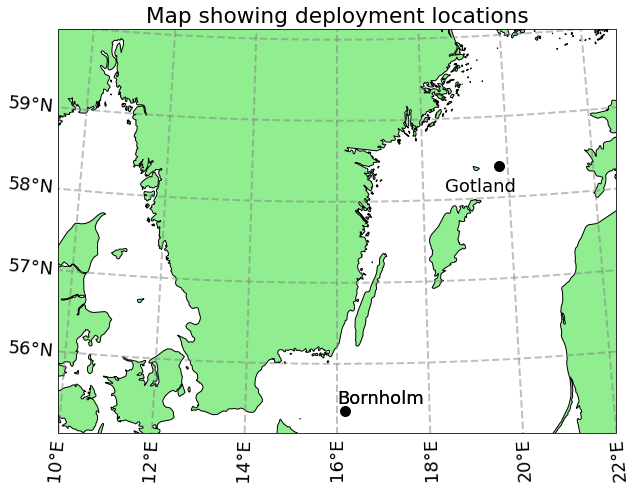

In [4]:
coord = cartopy.crs.AzimuthalEquidistant(central_longitude=16,
                                         central_latitude=55)
pc = cartopy.crs.PlateCarree()
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection=coord)

ax.scatter(ds_sea66_m10.longitude.mean(), ds_sea66_m10.latitude.mean(), transform=pc, color='k')
ax.text(16, 55.5, "Bornholm", transform=pc)
ax.scatter(ds_sea67_m26.longitude.mean(), ds_sea67_m26.latitude.mean(), transform=pc, color='k')
ax.text(18.5, 58.1, "Gotland", transform=pc)

feature = cartopy.feature.NaturalEarthFeature(name='land', category='physical',
                                              scale='10m', edgecolor='black', facecolor='lightgreen')
ax.add_feature(feature)
ax.set_extent((10, 22, 55, 60), crs=pc)
ax.text(16, 55.5, "Bornholm", transform=pc)
gl = ax.gridlines(draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = None
gl.right_labels = None
ax.set(title=f"Map showing deployment locations")
fig.savefig("figs/map.png")

# Low oxygen plots

Here we plot data from three gliders:

- **SEA061** JFE AROD 0038 deployed in Bornholm 2 missions
- **SEA066** RBR CODA 205592 deployed in Bornholm 3 missions
- **SEA067** RBR CODA 206115 deployed in Gotland 3 missions

For each glider, colours identify the mission. Mission numbers are the glider's internal count of being activated, not the total number of times it has ben deployed in the sea. Mission number is often incremented by tests/simulations on land. 

We subset the data to only samples taken below deeper than a set depth to select samples that should be in hypoxix/anoxic water. We use 70 m in Bornholm and 100 m in Gotland

### CODA in Bornholm

We see approximately linear increase in minimum oxygen registered. This drift seems to occur both during deployment and when the glder is in the workshop. A line has been added to approximately mark the drift. This drift is around 15 mmol m$^{-3}$ over 8 weeks.

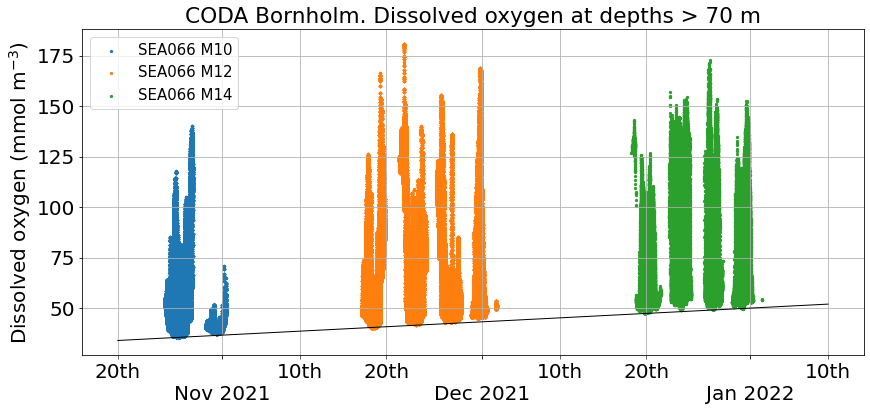

In [5]:
fig, ax = plt.subplots(figsize=(14, 6))
min_depth = 70
plot_oxy(ds_sea66_m10, ax, min_depth=min_depth)
plot_oxy(ds_sea66_m12, ax, min_depth=min_depth)
plot_oxy(ds_sea66_m14, ax, min_depth=min_depth)

ax.set(ylabel="Dissolved oxygen (mmol m$^{-3}$)", title=f"CODA Bornholm. Dissolved oxygen at depths > {min_depth} m")
ax.legend(loc=2)
ax.plot((datetime.datetime(2021,10,20), datetime.datetime(2022, 1, 10)), (34, 52), color="k")
ticker(ax)

fig.savefig("figs/low_oxy_sea66.png")

### AROD in Bornholm

Contrast with the AROD that:
1. Correctly identifies anoxic water
2. Does not have an obvious drift in time

Note the temporal overlap of this dataset with the CODA above

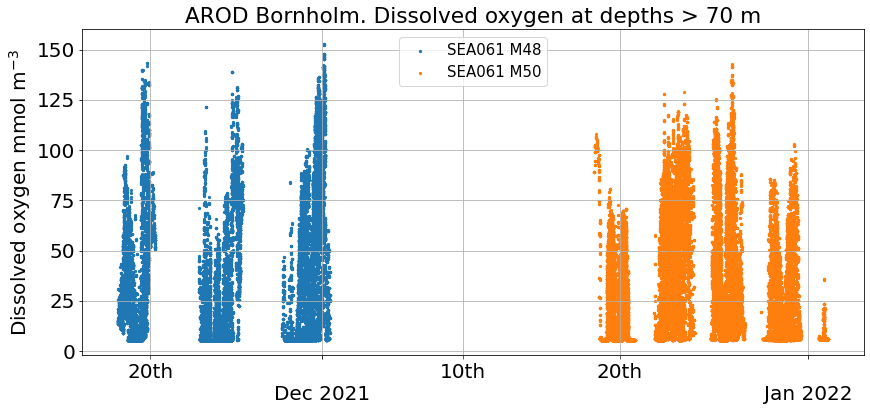

In [6]:
fig, ax = plt.subplots(figsize=(14, 6))
min_depth = 70
plot_oxy(ds_sea61_m48, ax, min_depth=min_depth)
plot_oxy(ds_sea61_m50, ax, min_depth=min_depth)

ticker(ax)
ax.legend(loc=9)
ax.set(ylabel="Dissolved oxygen mmol m$^{-3}$", title=f"AROD Bornholm. Dissolved oxygen at depths > {min_depth} m")
fig.savefig("figs/low_oxy_sea61.png")

### CODA in Gotland

This shows an ever stranger pattern. A non linear decease in minimum oxygen, then a sudden drop in minimum oxygen between the second and third missions. No changes were made to the sensor between missions. The glider was brought aboard a boat and recharged before being redeployed for mission 29.

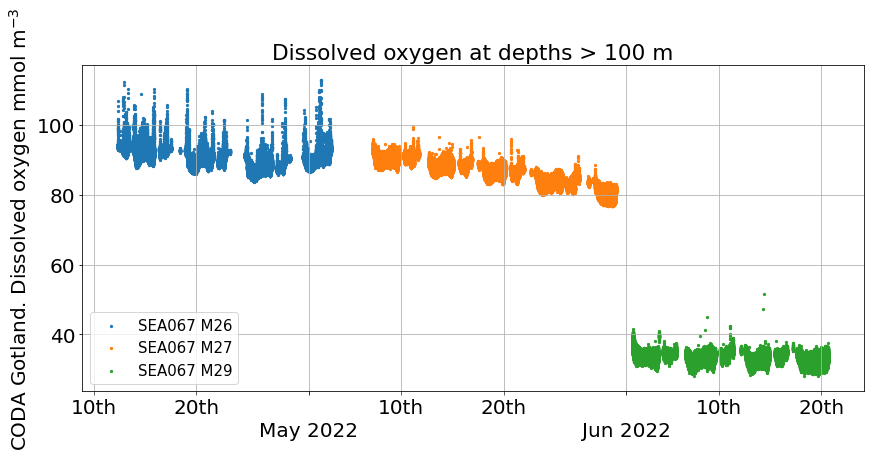

In [7]:
fig, ax = plt.subplots(figsize=(14, 6))
min_depth = 100
plot_oxy(ds_sea67_m26, ax, min_depth=min_depth)
plot_oxy(ds_sea67_m27, ax, min_depth=min_depth)
plot_oxy(ds_sea67_m29, ax, min_depth=min_depth)
ticker(ax)
ax.legend(loc=3)
ax.set(ylabel="CODA Gotland. Dissolved oxygen mmol m$^{-3}$", title=f"Dissolved oxygen at depths > {min_depth} m")
fig.savefig("figs/low_oxy_sea67.png")

----------------------------
# Additional plots

### Salinity and temperature from SEA067

No apparent change in water masses during dramatic decrease in dissolved oxygen concentration

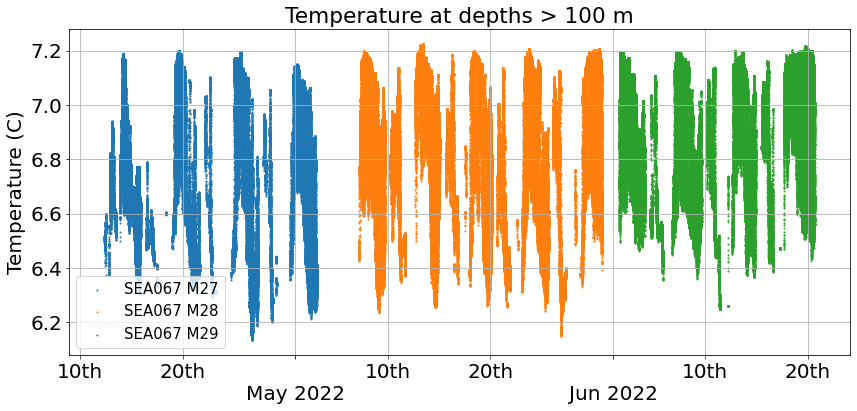

In [8]:
fig, ax = plt.subplots(figsize=(14, 6))
min_depth = 100
ds = ds_sea67_m26
mask = ds.depth.values > min_depth
ax.scatter(ds.time[mask], ds.temperature[mask], s=1, label="SEA067 M27")

ds = ds_sea67_m27
mask = ds.depth.values > min_depth
ax.scatter(ds.time[mask], ds.temperature[mask], s=1, label="SEA067 M28")

ds = ds_sea67_m29
mask = ds.depth.values > min_depth
ax.scatter(ds.time[mask], ds.temperature[mask], s=1, label="SEA067 M29")

#ax.set(ylabel="dissolved oxygen mmol m$^{-3}$", title="dissolved oxygen < 80 mmol m$^{-3}$",
#      xlim=(datetime.datetime(2022,5,1), datetime.datetime(2022,8,1)))
ticker(ax)
ax.legend(loc=3)
ax.set(ylabel="Temperature (C)", title="Temperature at depths > 100 m")
fig.savefig("figs/deep_temp_sea67.png")

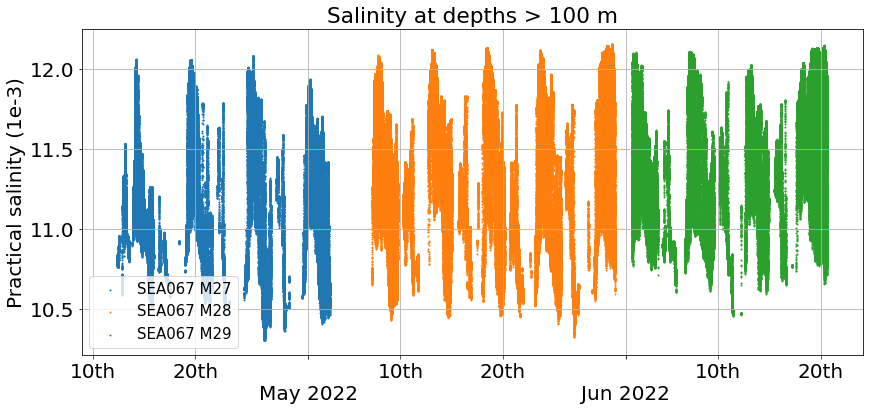

In [9]:
fig, ax = plt.subplots(figsize=(14, 6))
min_depth = 100
ds = ds_sea67_m26
mask = ds.depth.values > min_depth
ax.scatter(ds.time[mask], ds.salinity[mask], s=1, label="SEA067 M27")

ds = ds_sea67_m27
mask = ds.depth.values > min_depth
ax.scatter(ds.time[mask], ds.salinity[mask], s=1, label="SEA067 M28")

ds = ds_sea67_m29
mask = ds.depth.values > min_depth
ax.scatter(ds.time[mask], ds.salinity[mask], s=1, label="SEA067 M29")


ticker(ax)
ax.legend(loc=3)
ax.set(ylabel="Practical salinity (1e-3)", title="Salinity at depths > 100 m")
fig.savefig("figs/deep_sal_sea67.png")

### Alternative plot using upper bound for oxygen

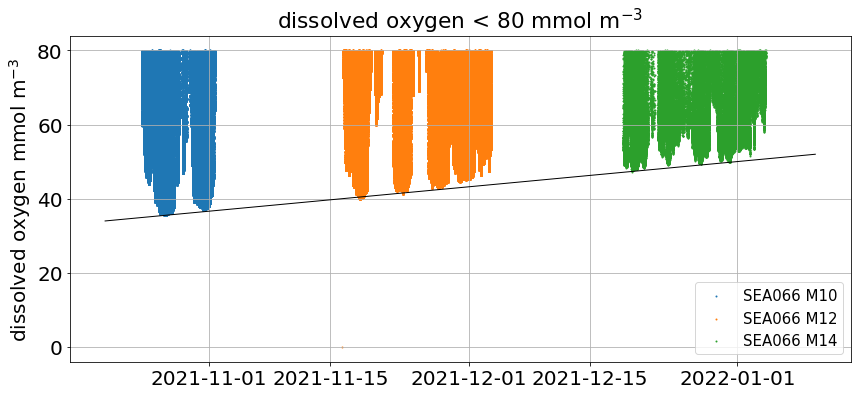

In [10]:
fig, ax = plt.subplots(figsize=(14, 6))
ds = ds_sea66_m10
mask = (ds.depth.values > 0) * (ds.oxygen_concentration.values <80)
ax.scatter(ds.time[mask], ds.oxygen_concentration[mask], s=1, label="SEA066 M10")

ds = ds_sea66_m12
mask = (ds.depth.values > 0) * (ds.oxygen_concentration.values <80)
ax.scatter(ds.time[mask], ds.oxygen_concentration[mask], s=1, label="SEA066 M12")


ds = ds_sea66_m14
mask = (ds.depth.values > 0) * (ds.oxygen_concentration.values <80)
ax.scatter(ds.time[mask], ds.oxygen_concentration[mask], s=1, label="SEA066 M14")
ax.set(ylabel="dissolved oxygen mmol m$^{-3}$", title="dissolved oxygen < 80 mmol m$^{-3}$")
ax.grid()
ax.legend(loc=4)
ax.plot((datetime.datetime(2021,10,20), datetime.datetime(2022, 1, 10)), (34, 52), color="k")
fig.savefig("figs/low_oxy_sea66.png")